# Домашнее задание

Градиентный спуск и Momentum своими руками.

## Quiz

Найдите минимум функции вручную (на бумажке):

$f(x) = x^2 - 30x + 1$

В ответ запишите точку минимума, округленную до сотых.

Используем библиотеку sympy для того, чтобы вычислять производные различных функций (при помощи `sp.diff`).

Ниже реализован метод одномерного градиентного спуска для нахождения минимума функции `f(x)`.

In [3]:
import sympy as sp
import matplotlib.pyplot as plt
import numpy as np

x = sp.Symbol('x')

Matplotlib is building the font cache; this may take a moment.


При помощи градиентного спуска найдем минимум функции
$f(x) = x^3 - 3x^2 + 4$.

In [4]:
def f(x):
  return x**3 - 3*x**2 + 4

In [5]:
def gradient_descent(x_start, learning_rate, epsilon, num_iterations):
    x_curr = x_start
    df_x = sp.diff(f(x)) # производная

    trace = []
    trace.append(x_curr)

    for i in range(num_iterations):
      x_new = x_curr - learning_rate * df_x.subs(x, x_curr)
      trace.append(x_new)

      if abs(x_new - x_curr) < epsilon:
        return x_curr, trace

      x_curr = x_new

    return x_curr, trace

Визуализируем процесс поиска минимума (красные точки) и найденный минимум (зеленая точка).

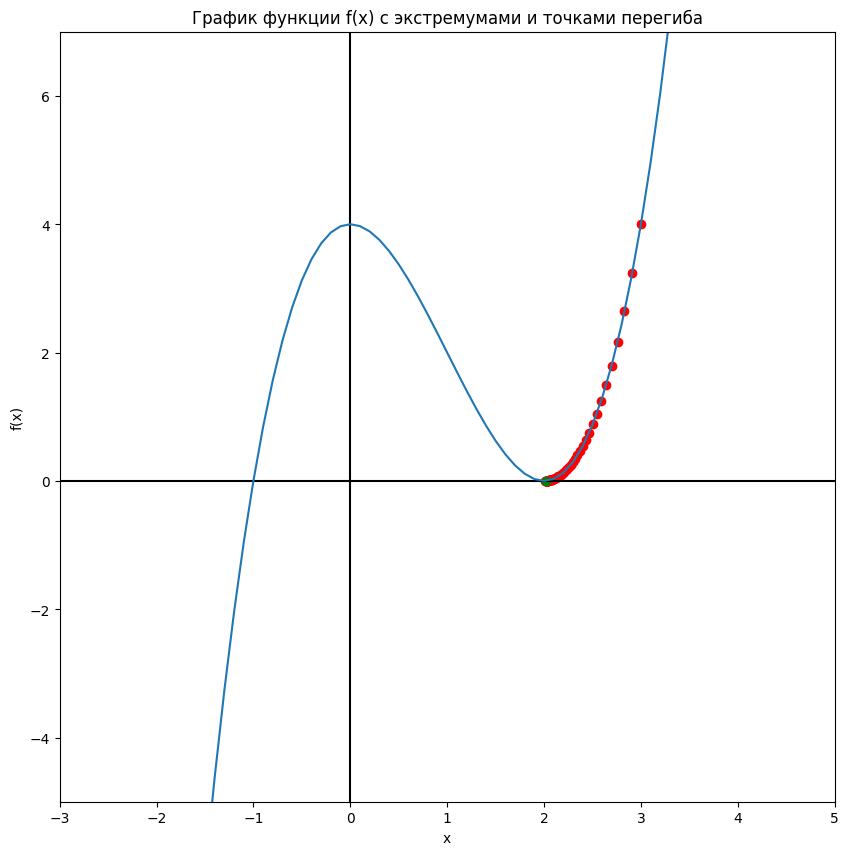

In [7]:
xmin, trace = gradient_descent(3, 0.01, 0.001, 100)

x_values = [x for x in np.arange(-5, 5, 0.1)]
f_values = [f(x) for x in x_values]

plt.figure(figsize=(10,10))

plt.axvline(x=0, c = 'black')
plt.axhline(y=0, c = 'black')

plt.plot(x_values, f_values)

plt.xlim([-3, 5])
plt.ylim([-5, 7])

plt.title('График функции f(x) c экстремумами и точками перегиба')

plt.xlabel('x')
plt.ylabel('f(x)')

trace_values = [f(x) for x in trace]
plt.scatter(trace, trace_values, c='red')
plt.scatter([xmin],[f(xmin)], c='green')

plt.show()

## Quiz

Запишите в ответ точку минимума, округленную до сотых.

In [8]:
xmin

2.01599304738014

Модифицируйте функцию, осуществляющую метод градиентного спуска с семинара:

* добавьте опцию останавливать метод, если абсолютное значение производной функции в точке < некоторого $\delta$ (delta добавьте в аргументы функции)

* добавьте в возвращаемые значения метода число произведенных методом итераций

In [12]:
# не забудьте добавить в возвращаемые значения функции число произведенных методом итераций


def gradient_descent_modified(
    x_start, learning_rate, epsilon, num_iterations, delta=1e-3
):
    x_curr = x_start
    df_x = sp.diff(f(x))

    trace = []
    trace.append(x_curr)

    for iter in range(num_iterations):
        derivative = df_x.subs(x, x_curr)

        if abs(derivative) < delta:
            return x_curr, trace, iter + 1

        x_new = x_curr - learning_rate * derivative
        trace.append(x_new)

        if abs(x_new - x_curr) < epsilon:
            return x_curr, trace, iter + 1

        x_curr = x_new

    return x_curr, trace, iter + 1

## Quiz

Визуализируйте результат работы метода (как в коде выше) и с теми же гиперпараметрами.

Также выведите на экран число произведенных итераций.
Сколько итераций произвел метод до остановки?

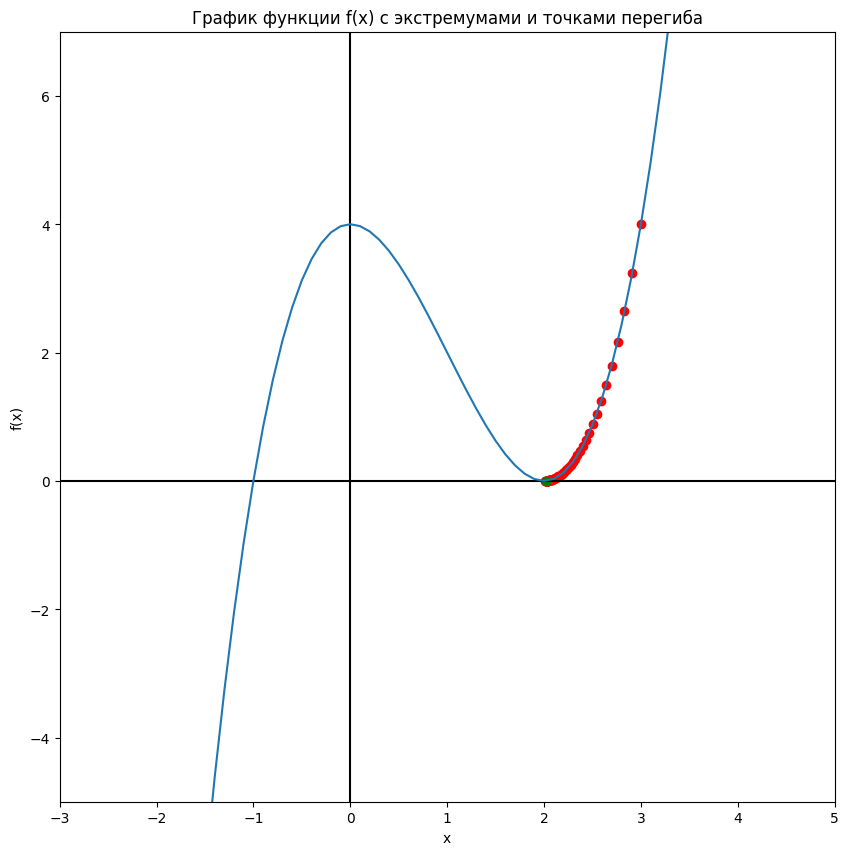

In [13]:
xmin, trace, num_iter = gradient_descent_modified(3, 0.01, 0.001, 100)

x_values = [x for x in np.arange(-3, 5, 0.1)]
f_values = [f(x) for x in x_values]

plt.figure(figsize=(10,10))

plt.axvline(x=0, c = 'black')
plt.axhline(y=0, c = 'black')

plt.plot(x_values, f_values)

plt.xlim([-3, 5])
plt.ylim([-5, 7])

plt.title('График функции f(x) c экстремумами и точками перегиба')

plt.xlabel('x')
plt.ylabel('f(x)')

trace_values = [f(x) for x in trace]
plt.scatter(trace, trace_values, c='red')
plt.scatter([xmin],[f(xmin)], c='green')

plt.show()

In [14]:
xmin, num_iter

(2.01599304738014, 61)

## Quiz

При каком начальном приближении модифицированная функция с гиперпараметрами
* `learning_rate = 0.001`
* `epsilon = 0.001`
* `num_iterations = 100`
* `delta = 1e-3`

верно находит глобальный минимум функции
$f(x) = (x+5)*(x+2)*(x-3)*(x-4)$?

Варианты ответа:

a) -1

b) 1

c) 3

d) 7

In [15]:
def f(x):
    return (x + 5) * (x + 2) * (x - 3) * (x - 4)

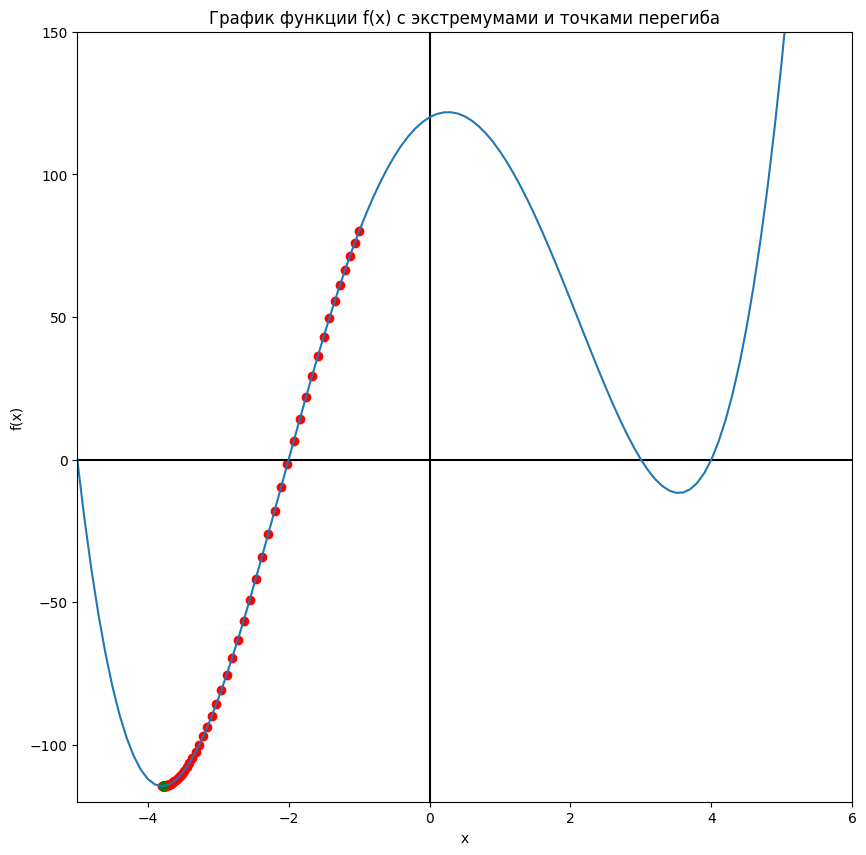

In [16]:
xmin, trace, num_iter = gradient_descent_modified(-1, 0.001, 0.001, 100)  # a) -1
# xmin, trace, num_iter = gradient_descent_modified(1, 0.001, 0.001, 100)  # b) 1
# xmin, trace, num_iter = gradient_descent_modified(3, 0.001, 0.001, 100)  # c) 3
# xmin, trace, num_iter = gradient_descent_modified(7, 0.001, 0.001, 100)  # d) 7

x_values = [x for x in np.arange(-5, 6, 0.1)]
f_values = [f(x) for x in x_values]

plt.figure(figsize=(10, 10))

plt.axvline(x=0, c="black")
plt.axhline(y=0, c="black")

plt.plot(x_values, f_values)

plt.xlim([-5, 6])
plt.ylim([-120, 150])

plt.title("График функции f(x) c экстремумами и точками перегиба")

plt.xlabel("x")
plt.ylabel("f(x)")

trace_values = [f(x) for x in trace]
plt.scatter(trace, trace_values, c="red")
plt.scatter([xmin], [f(xmin)], c="green")

plt.show()

Реализуйте модификацию метода градиентного спуска - Momentum:

$$x_{new} = x_{old} - h_{new},$$
$$h_{new} = \alpha\cdot h_{old} + \eta\cdot f'(x_{old})$$

В коде ниже
* $\eta$ обозначена как `learning_rate`
* $\alpha$ обозначена как `momentum`.

In [17]:
def momentum_method(x_start, learning_rate, epsilon, num_iterations, momentum, delta=0.01):

    x_curr = x_start
    df_x = sp.diff(f(x))

    trace = []
    trace.append(x_curr)

    h_curr = 0
    h_trace = []
    h_trace.append(h_curr)

    for i in range(1, num_iterations):

        h_new = momentum * h_curr + learning_rate * df_x.subs(x, x_curr)
        x_new = x_curr - h_new

        trace.append(x_new)
        h_trace.append(h_new)

        if (abs(x_new - x_curr) < epsilon) or (abs(df_x.subs(x, x_new)) < delta):
            return x_new, trace, i + 1

        x_curr = x_new
        h_curr = h_new


    return x_new, trace, i + 1

Проверьте, решает ли Momentum проблему застревания в локальном минимуме?

Используйте гиперпараметры из запуска выше и возьмите
* `x_start = 7`
* `momentum = 0.2`

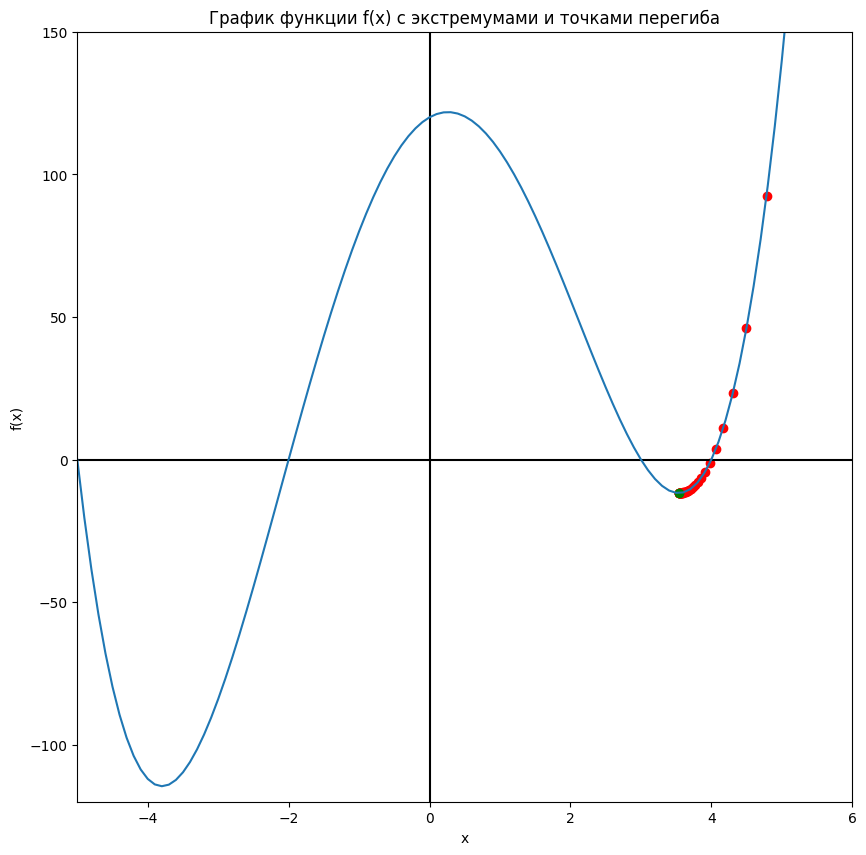

In [20]:
xmin, trace, num_iter = momentum_method(7, 0.001, 0.001, 100, momentum=0.2)

x_values = [x for x in np.arange(-5, 6, 0.1)]
f_values = [f(x) for x in x_values]

plt.figure(figsize=(10,10))

plt.axvline(x=0, c = 'black')
plt.axhline(y=0, c = 'black')

plt.plot(x_values, f_values)

plt.xlim([-5, 6])
plt.ylim([-120, 150])

plt.title('График функции f(x) c экстремумами и точками перегиба')

plt.xlabel('x')
plt.ylabel('f(x)')

trace_values = [f(x) for x in trace]
plt.scatter(trace, trace_values, c='red')
plt.scatter([xmin],[f(xmin)], c='green')

plt.show()

In [21]:
xmin

3.54348764934474

## Quiz

Выведите на экран значение найденной точки минимума с заданными гиперпараметрами, округленное до сотых.

Теперь запустите метод с гиперпараметрами:

* `x_start = 7`
* `momentum = 0.8`.

Остальные значения гиперпараметров оставьте как и раньше.

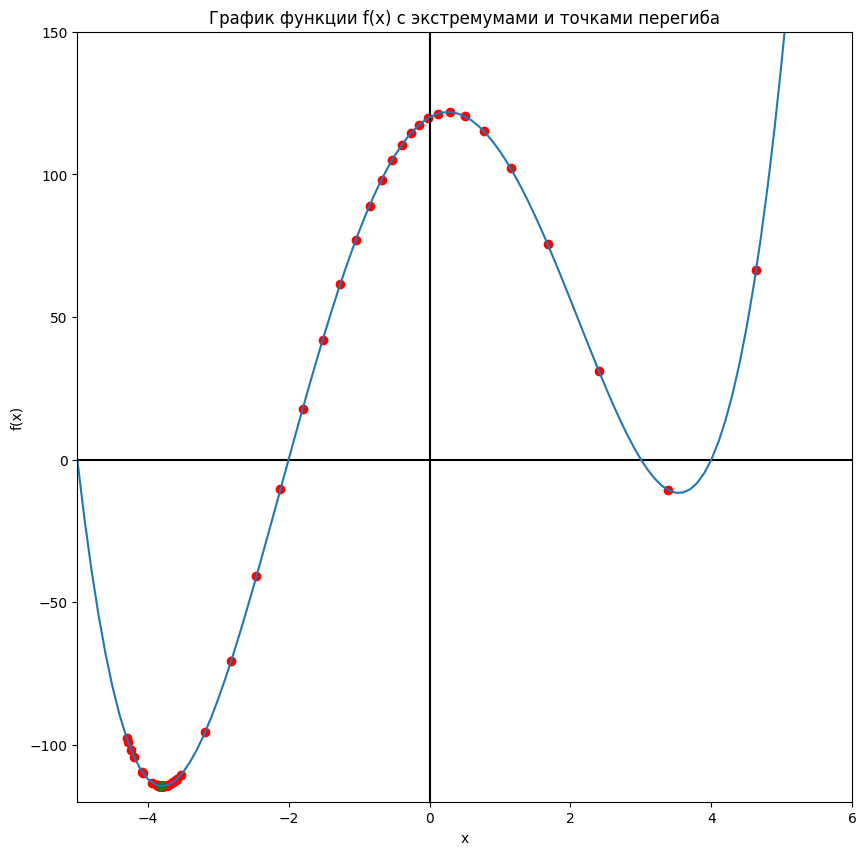

In [22]:
xmin, trace, num_iter = momentum_method(7, 0.001, 0.001, 100, momentum=0.8)

x_values = [x for x in np.arange(-5, 6, 0.1)]
f_values = [f(x) for x in x_values]

plt.figure(figsize=(10,10))

plt.axvline(x=0, c = 'black')
plt.axhline(y=0, c = 'black')

plt.plot(x_values, f_values)

plt.xlim([-5, 6])
plt.ylim([-120, 150])

plt.title('График функции f(x) c экстремумами и точками перегиба')

plt.xlabel('x')
plt.ylabel('f(x)')

trace_values = [f(x) for x in trace]
plt.scatter(trace, trace_values, c='red')
plt.scatter([xmin],[f(xmin)], c='green')

plt.show()

In [23]:
xmin

-3.80739499551855

## Quiz

Выведите на экран значение найденной точки минимума с заданными гиперпараметрами, округленное до десятых.